In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from os import listdir
from os.path import isfile, join

In [2]:
img = cv2.imread("C:/users/user/8k/images/384465575_31294122c0.jpg")
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (300, 200))
sizeX = 300
sizeY = 200

In [ ]:
plt.imshow(img)

In [3]:
num_of_frags = 5

In [4]:
def add_lines(img):
    for x in range(1, num_of_frags + 1):
        cordXstart = round((sizeX / num_of_frags)*x)
        cordXend = cordXstart + 2
        img[:, cordXstart:cordXend, :] = 255

    for y in range(1, num_of_frags + 1):
        cordYstart = round((sizeY / num_of_frags)*y)
        cordYend = cordYstart + 2
        img[cordYstart:cordYend,: , :] = 255
    return img   

In [5]:
seq = []
for x in range(num_of_frags):
    for y in range(num_of_frags):
        seq.append([x, y])

def swap():
    a = random.randint(0, num_of_frags**2 - 1)
    b = random.randint(0, num_of_frags**2 - 1)
    buf = seq[a]
    seq[a] = seq[b]
    seq[b] = buf

In [6]:
def render(img):
    newimg = np.full_like(img, 255)
    fragsizeY = round(sizeY / num_of_frags)
    fragsizeX = round(sizeX / num_of_frags)
    for y in range(num_of_frags):
        for x in range(num_of_frags):
            fromx = seq[y*num_of_frags + x][1]
            fromy = seq[y*num_of_frags + x][0]
            newimg[y*fragsizeY: (y+1)*fragsizeY,x*fragsizeX: (x+1)*fragsizeX, : ] = img[fromy*fragsizeY: (fromy+1)*fragsizeY,fromx*fragsizeX: (fromx+1)*fragsizeX, : ]
    return newimg

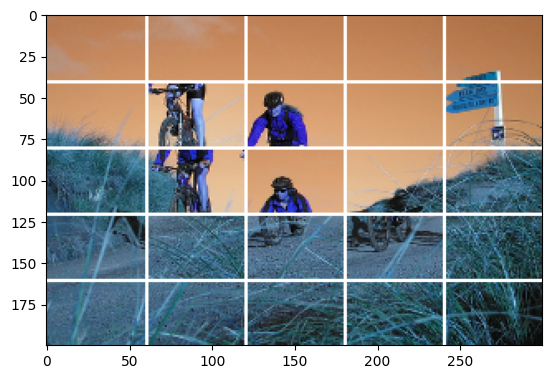

In [8]:
swap()
newimg = render(img)
newimg = add_lines(newimg)
plt.imshow(newimg)

In [ ]:
seq = []
for x in range(num_of_frags):
    for y in range(num_of_frags):
        seq.append([x, y])
        
newimg = render()
newimg = add_lines(newimg)
cv2.imshow("a", newimg)
cv2.waitKey(1000)

for _ in range(40):
    newimg = render()
    newimg = add_lines(newimg)
    cv2.imshow("a", newimg)
    swap()
    time.sleep(0.3)
    cv2.waitKey(1)
cv2.destroyAllWindows()

In [16]:
fn = "C:/users/user/8k/images"
bg_names = [fn + '/' + f for f in listdir(fn) if isfile(join(fn, f))]

num_of_frags = 5

for count, name in enumerate(bg_names):
    
    img = cv2.imread(name)
    img = cv2.resize(img, (sizeX, sizeY))
    img2 = add_lines(img)
    cv2.imwrite("dataset/right/" + str(count) + ".png", img2)
    
    seq = []
    for x in range(num_of_frags):
        for y in range(num_of_frags):
            seq.append([x, y])
    for _ in range(random.randint(1, 20)):
        swap()
        
    img = cv2.imread(name)    
    img = cv2.resize(img, (sizeX, sizeY))
    newimg = render(img)
    newimg = add_lines(newimg)
    cv2.imwrite("dataset/swaped/" + str(count) + ".png", newimg)
    